In [34]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [36]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

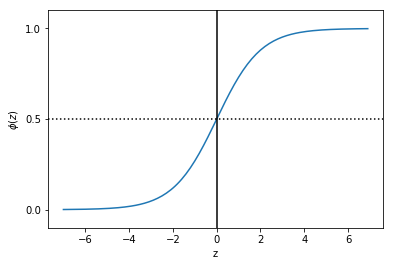

In [37]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [39]:
nba_data=pd.read_csv('shot_logs.csv')
cols = ['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE','PTS','SHOT_RESULT']
nba_data=nba_data[cols]



In [101]:
from sklearn.cross_validation import train_test_split
X, y = nba_data.iloc[:, :7].values, nba_data.iloc[:, 7:8].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=10)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=1000.0, random_state=0)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
lr.fit(X_train_std,y_train)

C:\Users\Prashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [103]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [104]:
print("Accuracy on the training set: %.3f" % lr.score(X_train,y_train))
print("Accuracy on the testing set: %.3f" % lr.score(X_test,y_test))

Accuracy on the training set: 0.511
Accuracy on the testing set: 0.509


array([[ 24. ,   1. ,   1. , ...,   1.9,   7.7,   2. ],
       [ 24. ,   2. ,   1. , ...,   0.8,  28.2,   3. ],
       [ 24. ,   3. ,   1. , ...,   2.7,  10.1,   2. ],
       ..., 
       [-16. ,   7. ,   4. , ...,   4.2,  16.9,   2. ],
       [-16. ,   8. ,   4. , ...,   4.5,  18.3,   2. ],
       [-16. ,   9. ,   4. , ...,   4.7,   5.1,   2. ]])

In [109]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly